#### Especificação do problema

O objetivo deste trabalho é implementar algumas operações em imagens, tanto monocromáticas quanto coloridas, no domínio espacial. As máscaras e matrizes apresentadas a seguir devem ser explicitamente utilizadas nos códigos, ou seja, eventuais funções disponíveis em bibliotecas não devem ser empregadas na implementação.


# Imagens Coloridas

Carregando as bibliotecas utilizadas: numpy, cv2 e matplotlib

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from math import floor

Carregando a imagem colorida a ser utilizada, podem ser utilizadas outras imagens coloridas.

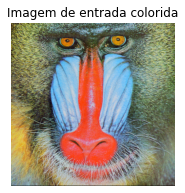

In [2]:
img = cv2.imread('./rgb/baboon.png')
plt.figure(figsize=(3,3))
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagem de entrada colorida')
plt.show()

Verificamos o tipo dos dados de entrada e o formato:

In [3]:
print("Tipo de entrada: {}, Formato: {}".format(type(img), img.shape))

Tipo de entrada: <class 'numpy.ndarray'>, Formato: (512, 512, 3)


A separação dos canais deve ser feita de acordo com cada biblioteca, neste caso como foi utilizado o opencv para a leitura da imagem de entrada, os canais são respectivamente [0] Blue, [1] Green e [2] Red - BGR.

In [4]:
red = img[:, :, 2]
green = img[:, :, 1]
blue = img[:, :, 0]

Para exibir cada canal através do pyplot do matplotlib, é necessário indicar como parâmetro (cmap) para a função de qual canal se trata [R] - 'Reds', [G] - 'Greens' ou [B] - 'Blues'

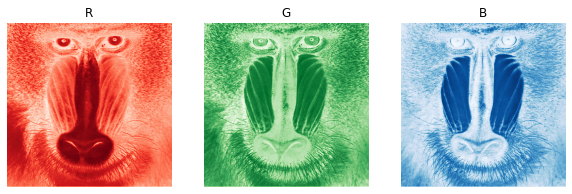

In [5]:
def plot_rgb(r,g,b):
    plt.figure(figsize=(10,15))

    plt.subplot(1,3,1)
    plt.axis("off")
    plt.title('R')
    plt.imshow(r, cmap='Reds')

    plt.subplot(1,3,2)
    plt.axis("off")
    plt.title('G')
    plt.imshow(g, cmap='Greens')

    plt.subplot(1,3,3)
    plt.axis("off")
    plt.title('B')
    plt.imshow(b, cmap='Blues')

    plt.show()

plot_rgb(red, green, blue)

##  Operações entre os canais

Após separar os canais podemos fazer operações para alterar a imagem, como mostradas abaixo. No qual, adicionamos uma taxa de cada elemento RGB em cada canal individual.

In [6]:
r = 0.393*red + 0.769*green + 0.189*blue
g = 0.349*red + 0.686*green+ 0.168*blue
b = 0.272*red + 0.534*green+ 0.131*blue

Recriamos a imagem com o mesmo tamanho inicial, entretanto preenchemos os canais com as alterações feitas anteriormente.

In [7]:
img_rec = np.zeros(img.shape, dtype='uint8')
img_rec[:,:,2] = r
img_rec[:,:,1] = g
img_rec[:,:,0] = b

Limitamos os valores em 255

In [8]:
img_rec[img_rec > 255] = 255

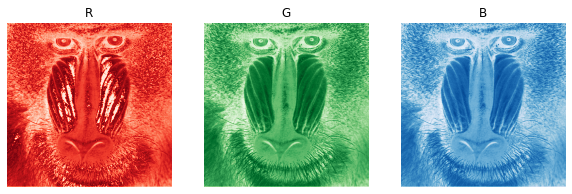

In [9]:
plot_rgb(img_rec[:,:,2], img_rec[:,:,1], img_rec[:,:,0])

<b>Resultado final</b>

Podemos verificar que alteramos as cores da imagem, pois alteramos os valores de cada canal, por tanto no conjunto final a imagem acaba ficando em tons mais escuros. Pois foi aumentado as intensidades dos 3 canais.

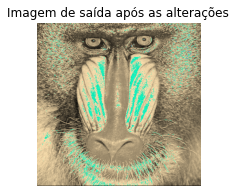

In [10]:
plt.figure(figsize=(3,3))
plt.imshow(cv2.cvtColor(img_rec, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('Imagem de saída após as alterações')
plt.show()

In [11]:
print("Valores originais: {} R - {} G - {} B".format(np.sum(img[:,:,2]), np.sum(img[:,:, 1]), np.sum(img[:,:, 0])))
print("Valores alterados: {} R - {} G - {} B".format(np.sum(img_rec[:,:,2]), np.sum(img_rec[:,:, 1]), np.sum(img_rec[:,:, 0])))

Valores originais: 36016314 R - 33779555 G - 29652971 B
Valores alterados: 41536604 R - 40561591 G - 31588434 B


### Transformação em 1 canal

Além das alterações de cada canal, também podemos transformar a imagem em apenas um canal de banda, combinando os outros canais em apenas um canal de saída.

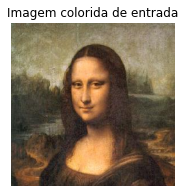

In [12]:
plt.figure(figsize=(3,3))
img_mona = cv2.imread('./rgb/monalisa.png')
plt.axis('off')
plt.title('Imagem colorida de entrada')
plt.imshow(cv2.cvtColor(img_mona, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
mona_oneband =  0.2989*img_mona[:,:,2]+ 0.5870*img_mona[:,:,1]+ 0.1140*img_mona[:,:,0]

Podemos notar que a imagem acaba ficando em tons de cinza, pois perde as informações dos outros canais que formam a coloração.

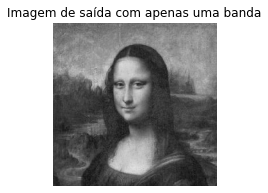

In [14]:
plt.figure(figsize=(3,3))
plt.imshow(mona_oneband,  cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Imagem de saída com apenas uma banda')
plt.show()

In [15]:
print("Tipo de saída: {}, Formato: {}".format(type(mona_oneband), mona_oneband.shape))

Tipo de saída: <class 'numpy.ndarray'>, Formato: (256, 256)


-----------------------------------------------------------------------------------------------------------------

# Imagens monocromáticas

## Aplicação de filtros

Carregando a imagem monocromática a ser utilizada, podem ser utilizadas outras imagens monocromáticas.

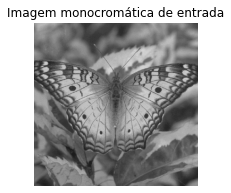

In [16]:
plt.figure(figsize=(3,3))
img_mono = cv2.imread('./bw/butterfly.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_mono, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Imagem monocromática de entrada')
plt.show()

In [17]:
print("Tipo de entrada: {}, Formato: {}".format(type(img_mono), img_mono.shape))

Tipo de entrada: <class 'numpy.ndarray'>, Formato: (512, 512)


Adicionando os filtros que serão utilizados.

In [18]:
h1 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
h2 = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
h3 = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
h4 = 1/9* np.ones((3,3), dtype='uint8')
h5 = np.array([[-1,-1,2], [-1,2,-1], [2,-1,-1]])
h6 = np.array([[2,-1,-1], [-1,2,-1], [-1,-1,2]])
h7 = np.array([[0,0,1], [0,0,0], [-1,0,0]])
h8 = np.array([[0,0,-1,0,0], [0,-1,-2,-1,0], [-1,-2,16,-2,-1], [0,-1,-2,-1,0], [0,0,-1,0,0]])
h9 = 1/256 * np.array([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]])

A convolução foi feita de forma vetorial utilizando o numpy.einsum(), no qual nessa configuração de 'ij,klij->kl' todos os valores de A são multiplicados por B. Portanto, a única coisa que precisamos fazer antes é subdividir a imagem de entrada por várias matrizes do mesmo formato do filtro a ser utilizado, isso pode ser feito através da função do numpy stride_tricks.sliding_windows_view.(https://ajcr.net/Basic-guide-to-einsum/)



<img src="./convolution.png" style="width:800px;height:300px;">


In [19]:
def filter_apply(img, filter_win):
    # Criando a borda de acordo com a dimensão da máscara
    pixel = floor(filter_win.shape[0]/2)
    img = cv2.copyMakeBorder(img,pixel,pixel,pixel,pixel, cv2.BORDER_CONSTANT) 
    
    # Subdividir a imagem de entrada em subimagens com o mesmo tamanho do filtro
    sub_matrices =  np.lib.stride_tricks.sliding_window_view(img,  filter_win.shape)
    
    # Multiplica os valores do filtro por cada submatriz e retorna a soma de cada submatriz
    return np.einsum('ij,klij->kl', filter_win, sub_matrices)


# Aplicação dos filtros
filter_h1 = filter_apply(img_mono, h1) # Derivada parcial em x - Detecção de linha horizontal - Sobel
filter_h2 = filter_apply(img_mono, h2) # Derivada parcial em y - Detecção de linha vertical - Sobel
filter_h3 = filter_apply(img_mono, h3) # Laplaciano 
filter_h4 = filter_apply(img_mono, h4) # Média
filter_h5 = filter_apply(img_mono, h5) # Detecção de linha - (45º)
filter_h6 = filter_apply(img_mono, h6) # Detecçao de linha - (-45º)
filter_h7 = filter_apply(img_mono, h7) # Diferença das laterais
filter_h8 = filter_apply(img_mono, h8) # (-) Laplaciano de um filtro gaussiano 
filter_h9 = filter_apply(img_mono, h9) # Gaussiano

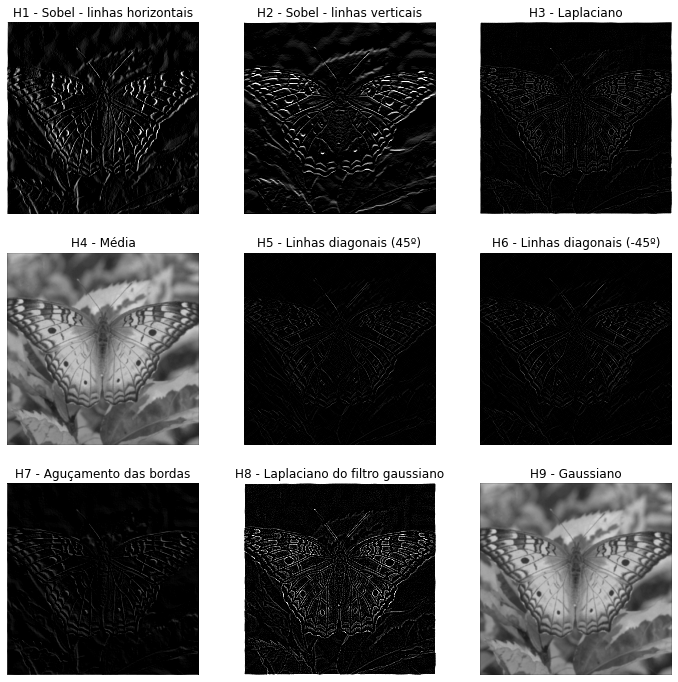

In [20]:
plt.figure(figsize=(12,12))

plt.subplot(3,3,1)
plt.axis("off")
plt.title('H1 - Sobel - linhas horizontais')
plt.imshow(filter_h1, cmap='gray', vmin=0, vmax=255)

plt.subplot(3,3,2)
plt.axis("off")
plt.title('H2 - Sobel - linhas verticais')
plt.imshow(filter_h2, cmap='gray', vmin=0, vmax=255)

plt.subplot(3,3,3)
plt.axis("off")
plt.title('H3 - Laplaciano')
plt.imshow(filter_h3, cmap='gray', vmin=0, vmax=255)

plt.subplot(3,3,4)
plt.axis("off")
plt.title('H4 - Média')
plt.imshow(filter_h4, cmap='gray', vmin=0, vmax=255)

plt.subplot(3,3,5)
plt.axis("off")
plt.title('H5 - Linhas diagonais (45º)')
plt.imshow(filter_h5, cmap='gray', vmin=0, vmax=255)

plt.subplot(3,3,6)
plt.axis("off")
plt.title('H6 - Linhas diagonais (-45º)')
plt.imshow(filter_h6, cmap='gray', vmin=0, vmax=255)

plt.subplot(3,3,7)
plt.axis("off")
plt.title('H7 - Aguçamento das bordas')
plt.imshow(filter_h7, cmap='gray', vmin=0, vmax=255)

plt.subplot(3,3,8)
plt.axis("off")
plt.title('H8 - Laplaciano do filtro gaussiano')
plt.imshow(filter_h8, cmap='gray', vmin=0, vmax=255)

plt.subplot(3,3,9)
plt.axis("off")
plt.title('H9 - Gaussiano')
plt.imshow(filter_h9, cmap='gray', vmin=0, vmax=255)

plt.show()


### Filtro aplicados

- H1 - Este filtro é responsável pela detecção de linhas horizontais;
- H2 - Este filtro é responsável pela detecção de linhas verticais;
- H3 - Este filtro é responsável pela derivada segunda da imagem, realça alta variação de cor (bordas), portanto gera uma borda fina.
- H4 - Este filtro é responsável por suavizar (blur) a imagem através da média dos pixels;
- H5 - Este filtro é responsável pela detecção de linhas diagonais em 45º;
- H6 - Este filtro é responsável pela detecção de linhas diagonais em -45º;
- H7 - Este filtro calcula a diferença das laterais, causa um aguçamento das bordas pois gera uma impressão de profundidade; 
- H8 - Combinação entre o filtro que gera realce das bordas (Laplaciano) e retira ruídos (Gaussiano);
- H9 - Este filtro é um passa-baixa, responsável por filtrar os tons altos da imagem (ruídos).

### Filtro detector de bordas

Este filtro de borda é conhecido como Detector de bordas de Sobel, é dado pela combinação dos filtros h1 e h2, que são uma combinação de derivadas verticais e horizontais.


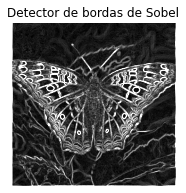

In [21]:
filter_h1_h2 = np.sqrt(filter_h1**2 + filter_h2**2)
plt.figure(figsize=(3,3))
plt.axis("off")
plt.imshow(filter_h1_h2, cmap='gray', vmin=0, vmax=255)
plt.title('Detector de bordas de Sobel')
plt.show()

In [22]:
print("Tipo de entrada: {}, Formato: {}".format(type(filter_h1_h2), filter_h1_h2.shape))

Tipo de entrada: <class 'numpy.ndarray'>, Formato: (512, 512)


### Testes realizados 

#### Imagens Coloridas

- Aplicação em todo conjunto de imagens fornecido;
- Modificação nos valores de cada equação;
- Plot dos canais separados;
- Plot da entrada e saída para comparação;
- Verificação do tamanho da entrada e saída.

#### Imagens Monocromáticas

- Aplicação em todo conjunto de imagens fornecido;
- Implementação da versão não vetorizada e vetorizada da função de aplicação dos filtros;
- Plot da entrada e saída para comparação;
- Verificação da diferença entre cada filtro;
- Aplicação do filtro com borda e sem borda (diminuindo o tamanho da imagem);
- Identificação do filtro de Sobel - detector de bordas.